In [4]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [18]:
error = mean_absolute_error

In [3]:
X_ltrain, X_test, Y_ltrain, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [66]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_ltrain, Y_ltrain, test_size = 100, random_state = 13)

In [49]:
X_train.shape

(554, 27827)

# Without Feature Selection

# Without Datat Processing

In [67]:
T_ltrain = X_ltrain.copy()
T_train  = X_train.copy()
T_valid = X_valid.copy()
T_test   = X_test.copy()

# Try different regression models

## Linear Regression

### No need for optimization

### Learning Curve

In [63]:
lr = LinearRegression()
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))

In [81]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    lr.fit(Tt_train,Yt_train)
    Y_pred = lr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_lr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
Wall time: 19 s


In [92]:
optimal_index_loss_lr = np.unravel_index(losses_lr.argmin(), losses_lr.shape)
optimal_n_train_lr = numbers_train[optimal_index_loss_lr]
min_loss_lr = losses_lr[optimal_index_loss_lr]
print("Minimum loss of LR without Feature Selection is {} when number of train is {}  ".format(losses_lr.min(),optimal_n_train))

Minimum loss of LR without Feature Selection is 0.4498042156454185 when number of train is 554  


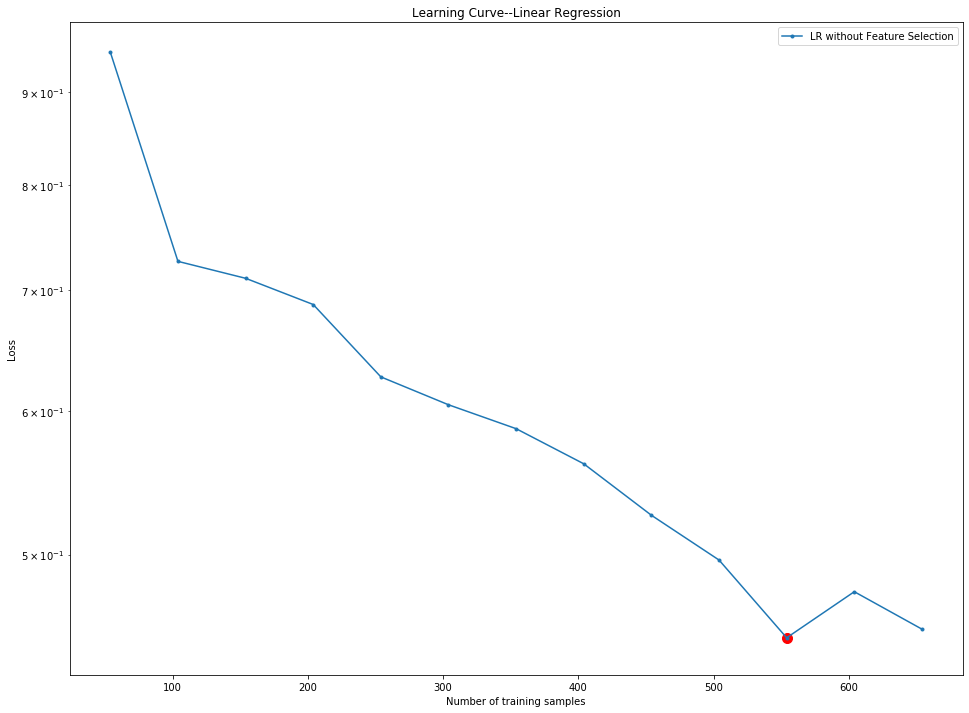

In [136]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_lr,'.-', label='LR without Feature Selection')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Linear Regression')
plt.show()

Minimum loss of LR without Feature Selection is 0.4498042156454185 


## Ridge Regression

### Optimization

#### Optimization of alpha

In [74]:
%%time
alphas =  np.logspace(-8, -1, 15)
losses_rr_alpha = np.zeros((len(alphas)))
for i,alpha in enumerate(alphas):
    rr = Ridge(alpha = alpha)
    rr.fit(T_train, Y_train)
    Y_pred = rr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_rr_alpha[i] = loss
    print(alpha)

1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
Wall time: 4.09 s


In [113]:
optimal_index_alpha_rr = np.unravel_index(losses_rr_alpha.argmin(), losses_rr_alpha.shape)
optimal_alpha_rr = alphas[optimal_index_alpha_rr]
print("Optimal alpha for RR without Feature Selection is {} ".format(optimal_alpha_rr))

Optimal alpha for RR without Feature Selection is 0.0031622776601683794 


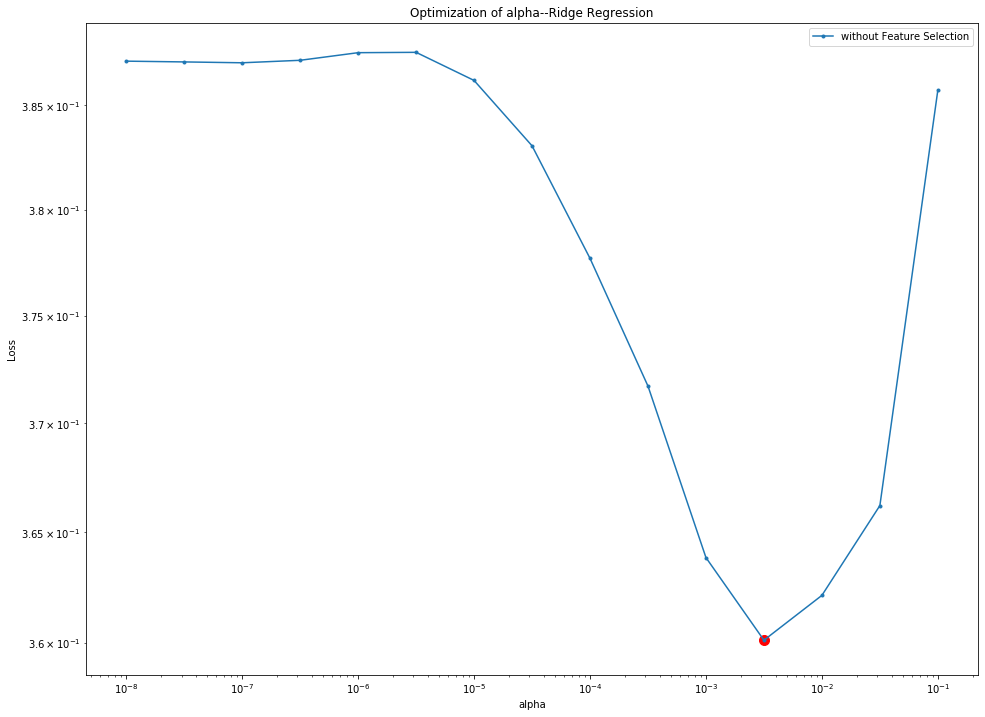

In [90]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_rr_alpha,'.-', label='without Feature Selection')
plt.scatter(optimal_alpha_rr, losses_rr_alpha[optimal_index_alpha_rr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Ridge Regression')
plt.show()

### Learning Curve

In [140]:
best_rr = Ridge(alpha = optimal_alpha_rr)
numbers_train = np.arange(54,655,50)
losses_rr = np.zeros((len(numbers_train)))

In [141]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_rr.fit(Tt_train,Yt_train)
    Y_pred = best_rr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_rr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
Wall time: 2.19 s


In [142]:
losses_rr

array([0.95536246, 0.71432031, 0.69281227, 0.67369255, 0.60760479,
       0.59756037, 0.57978955, 0.57098208, 0.54274203, 0.49730011,
       0.45739753, 0.46429929, 0.43147259])

In [143]:
optimal_index_loss_rr = np.unravel_index(losses_rr.argmin(), losses_rr.shape)
optimal_n_train_rr = numbers_train[optimal_index_loss_rr]
min_loss_rr = losses_rr[optimal_index_loss_rr]
print("Minimum loss of RR without Feature Selection is {} when number of train is {}  ".format(min_loss_rr,optimal_n_train_rr))

Minimum loss of RR without Feature Selection is 0.43147259167798274 when number of train is 654  


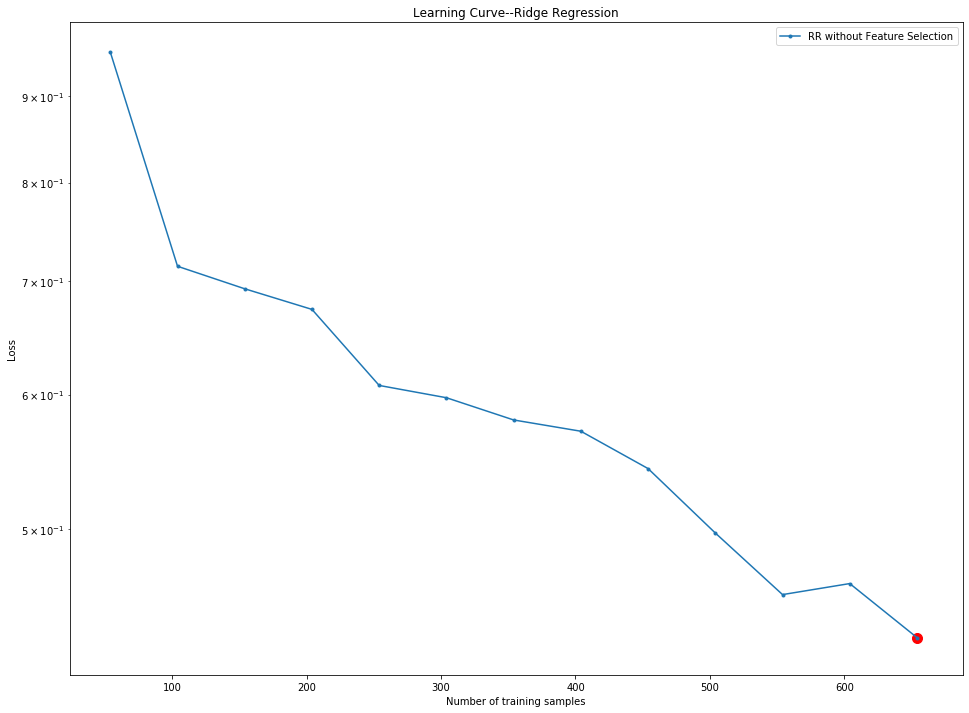

In [144]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_rr,'.-', label='without Feature Selection')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Ridge Regression')
plt.show()

## Kernel Ridge Regression

### Optimization

#### Optimization of gamma

In [114]:
%%time
gammas =  np.logspace(-4, 1, 11)
losses_krr_gamma = np.zeros((len(gammas)))
kernel_params = {"kernel": "rbf", "gamma": 1.0}
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = 1e-6, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_gamma[i] = loss
    print(gamma)

0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
Wall time: 5.05 s


In [118]:
optimal_index_gamma_krr = np.unravel_index(losses_krr_gamma.argmin(), losses_krr_gamma.shape)
optimal_gamma_krr = gammas[optimal_index_gamma_krr]
print("Optimal gamma for KRR without Feature Selection is {} ".format(optimal_gamma_krr))

Optimal gamma for KRR without Feature Selection is 0.03162277660168379 


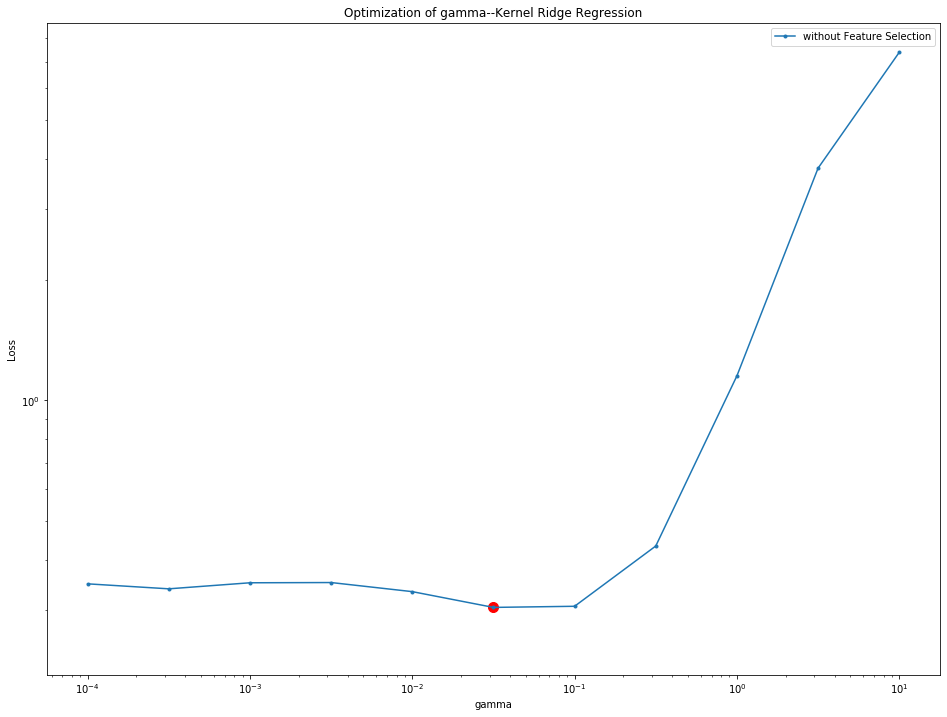

In [123]:
plt.figure(figsize=(16, 12))
plt.plot(gammas,losses_krr_gamma,'.-', label='without Feature Selection')
plt.scatter(optimal_gamma_krr, losses_krr_gamma[optimal_index_gamma_krr], s = 100,marker='o', color='r')
plt.xlabel('gamma')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of gamma--'+'Kernel Ridge Regression')
plt.show()

#### Optimization of alpha

In [120]:
%%time
alphas =  np.logspace(-8, -1, 15)
losses_krr_alpha = np.zeros((len(alphas)))
kernel_params = {"kernel": "rbf", "gamma": optimal_gamma_krr}
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_alpha[i] = loss
    print(alpha)

1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
Wall time: 7.29 s


In [122]:
optimal_index_alpha_krr = np.unravel_index(losses_krr_alpha.argmin(), losses_krr_alpha.shape)
optimal_alpha_krr = alphas[optimal_index_alpha_krr]
print("Optimal alpha for KRR without Feature Selection is {} ".format(optimal_alpha_krr))

Optimal alpha for KRR without Feature Selection is 0.001 


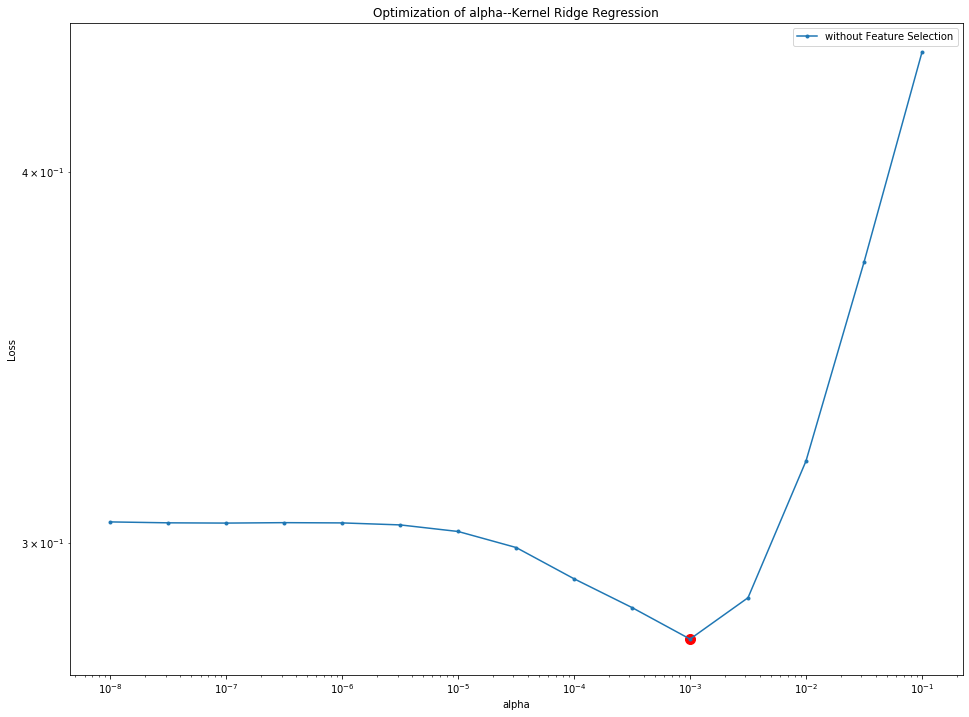

In [125]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_krr_alpha,'.-', label='without Feature Selection')
plt.scatter(optimal_alpha_krr, losses_krr_alpha[optimal_index_alpha_krr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Kernel Ridge Regression')
plt.show()

### Learning Curve

In [127]:
best_krr = KernelRidge(alpha = optimal_alpha_krr, **kernel_params)
numbers_train = np.arange(54,655,50)
losses_krr = np.zeros((len(numbers_train)))

In [128]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_krr.fit(Tt_train,Yt_train)
    Y_pred = best_krr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_krr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
Wall time: 3.66 s


In [131]:
losses_krr

array([1.02225941, 0.71401027, 0.7025906 , 0.67383608, 0.61408062,
       0.50513328, 0.47225396, 0.45330357, 0.41158579, 0.39007555,
       0.3740633 , 0.36975592, 0.33980624])

In [132]:
optimal_index_loss_krr = np.unravel_index(losses_krr.argmin(), losses_krr.shape)
optimal_n_train_krr = numbers_train[optimal_index_loss_krr]
min_loss_krr = losses_krr[optimal_index_loss_krr]
print("Minimum loss of KRR without Feature Selection is {} when number of train is {}  ".format(min_loss_krr,optimal_n_train_krr))

Minimum loss of KRR without Feature Selection is 0.3398062396503003 when number of train is 654  


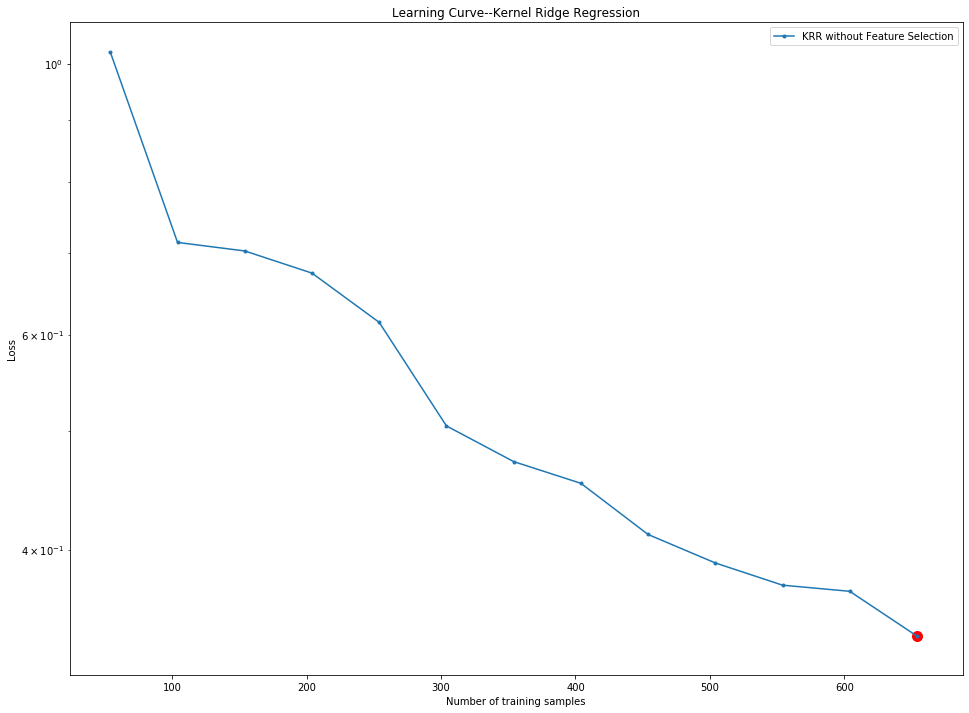

In [146]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='without Feature Selection')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression')
plt.show()

### Summary

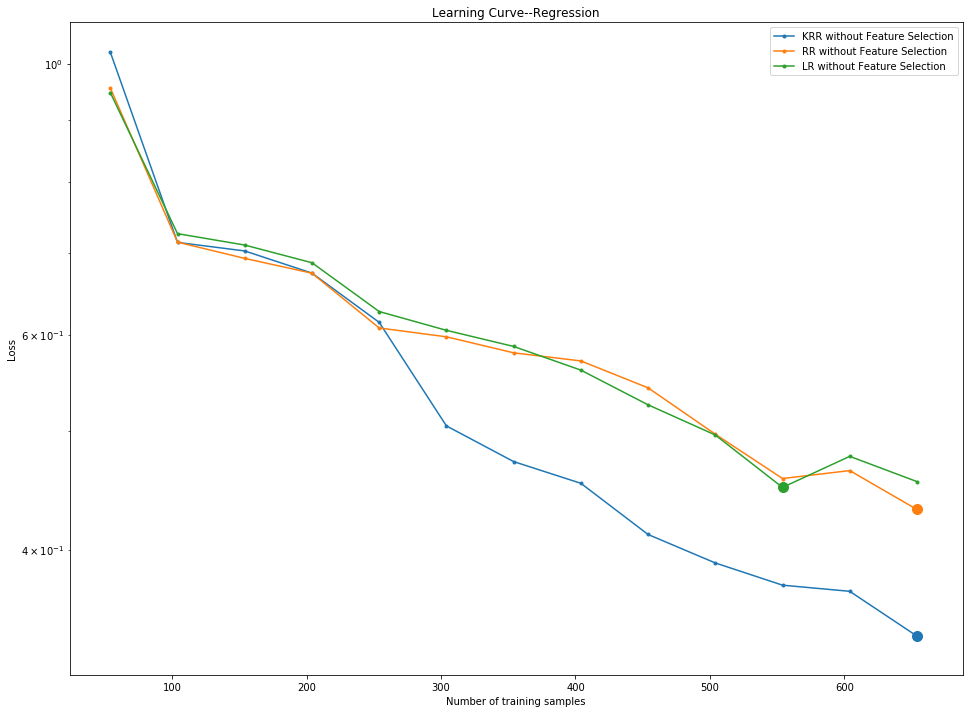

In [148]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='KRR without Feature Selection')
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o')
plt.plot(numbers_train,losses_rr,'.-', label='RR without Feature Selection')
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o')
plt.plot(numbers_train,losses_lr,'.-', label='LR without Feature Selection')
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o')

plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Regression')
plt.show()